In [14]:
from hil_control.hw_rev4_dock_undock import run_test
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from datetime import datetime

In [19]:
results = run_test(100)

calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling 

In [3]:
def plot_iteration(results: list, iteration: int):
    fig, (ax0, ax1) = plt.subplots(2)
    ax0.plot(results[iteration]["dock_currents"])
    ax0.set_title(f"docking current. Result: {results[iteration]['dockingstate_after_docking']}")
    ax1.plot(results[iteration]["undock_currents"])
    ax1.set_title(f"undocking current. Result: {results[iteration]['dockingstate_after_undocking']}")
    plt.suptitle(f"data for iteration {iteration}")
    plt.tight_layout()

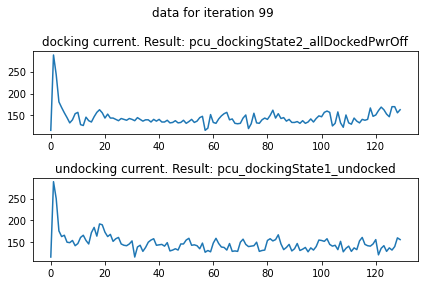

In [21]:
plot_iteration(results, 99)

In [22]:
with open(f'results_{datetime.now().isoformat()}.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(results, file)